In [530]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy

In [531]:
rough_files = glob.glob("rec_lattice_rough/sim_data/rough*.txt")
het_files = glob.glob("rec_lattice_rough/sim_data/het*.txt")

In [532]:

K_var = [50000, 100000, 500000,1000000]
K_str = ["K"+str(K)+"_" for K in K_var]


B_var = [0,3.5,6,10]
B_str = ["B"+str(B)+"_" for B in B_var]

In [533]:
rough_data=np.zeros((4,4,26,1000,2,11)) 
het_data=np.zeros((4,4,26,1000,2)) 
for Kn, Ki,K in zip(range(len(K_var)),K_var,K_str):
    for Bn,Bi,B in zip(range(len(B_var)),B_var,B_str):

        rough_sub_files=[]
        het_sub_files = []

        for fr,fh in zip(rough_files,het_files):
            if K in fr and B in fr:
                rough_sub_files.append(fr)
            if K in fh and B in fh:
                het_sub_files.append(fh)
                
         
        for i,fr,fh in zip(range(len(rough_sub_files)),rough_sub_files,het_sub_files):
            try:
                arr = np.loadtxt(fr,delimiter =  ', ',skiprows=1)
                rough_data[Bn,Kn,i,:,0]= np.concatenate((np.repeat(np.array([[0,10,20,30,40,50]]),1000,axis=0),
                                             np.array([arr[:,-1]-8,arr[:,-1]-6,arr[:,-1]-4,arr[:,-1]-2,arr[:,-1]]).T),axis=1)
                rough_data[Bn,Kn, i,:,1] = arr[:,1:-1]
                
                het_data[Bn,Kn,i]= np.loadtxt(fh,delimiter =  ', ')
                
            except:
                None
            


/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: loadtxt: Empty input file: "rec_lattice_rough/sim_data/het_K50000_M0.25_B0_G0.01_2020-07-23-13-52-53.txt"


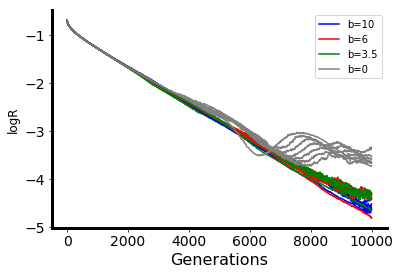

In [548]:
fig,ax=plt.subplots()

ax.plot(np.linspace(0,9990,1000),np.log(np.mean(rough_data[3,:-1,0,:,1,:6],axis=0)),color='b')
ax.plot(np.linspace(0,9990,1000),np.log(np.mean(rough_data[2,:-1,0,:,1,:6],axis=0)),color='r')
ax.plot(np.linspace(0,9990,1000),np.log(np.mean(rough_data[1,:-1,0,:,1,:6],axis=0)),color='g')
ax.plot(np.linspace(0,9990,1000),np.log(np.mean(rough_data[0,:-1,0,:,1,:6],axis=0)),color='grey')
ax.plot(np.linspace(0,9990,1000),np.log(np.mean(rough_data[3,-1,0,:,1,:6],axis=1)),color='b',label='b=10')
ax.plot(np.linspace(0,9990,1000),np.log(np.mean(rough_data[2,-1,0,:,1,:6],axis=1)),color='r',label='b=6')
ax.plot(np.linspace(0,9990,1000),np.log(np.mean(rough_data[1,-1,0,:,1,:6],axis=1)),color='g',label='b=3.5')
ax.plot(np.linspace(0,9990,1000),np.log(np.mean(rough_data[0,-1,0,:,1,:6],axis=1)),color='grey',label='b=0')

ax.set_xlabel('Generations',fontsize=16)
plt.legend()
ax.set_ylabel('logR',fontsize=12)


plt.tick_params(axis='both', which='major', labelsize=14)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [575]:
rough_files = glob.glob("rec_lattice_rough/sim_data_full/rough*.txt")
bound_files = glob.glob("rec_lattice_rough/sim_data_full/pos*.txt")
het_files = glob.glob("rec_lattice_rough/sim_data_full/het*.txt")
pop_files = glob.glob("rec_lattice_rough/sim_data_full/pop*.txt")

In [576]:

K_var = [50000, 100000, 500000,1000000]
K_str = ["K"+str(K)+"_" for K in K_var]


B_var = [0,1,2,3,4,5,6,10]
B_str = ["B"+str(B)+"_" for B in B_var]

In [577]:
rough_data=np.zeros((8,4,101,200,8)) 
bounds_data=np.zeros((8,4,101,200,8)) 
het_data=np.zeros((8,4,101,200,2)) 
for Kn, Ki,K in zip(range(len(K_var)),K_var,K_str):
    for Bn,Bi,B in zip(range(len(B_var)),B_var,B_str):

        rough_sub_files=[]
        pos_sub_files = []
        het_sub_files = []

        for fr,fp,fh in zip(rough_files,bound_files,het_files):
            if K in fr and B in fr:
                rough_sub_files.append(fr)
            if K in fp and B in fp:
                pos_sub_files.append(fp)
            if K in fh and B in fh:
                het_sub_files.append(fh)
                
                
         
        for i,fr,fp,fh in zip(range(len(rough_sub_files)),rough_sub_files,bound_files,het_sub_files):
            try:
                rough_data[Bn,Kn,i] = np.loadtxt(fr,delimiter =  ', ')
                bounds_data[Bn,Kn,i] = np.loadtxt(fp,delimiter =  ', ')

                

                
                het_data[Bn,Kn,i]= np.loadtxt(fh,delimiter =  ', ')
                
            except:
                None
            


/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: loadtxt: Empty input file: "rec_lattice_rough/sim_data_full/rough_K50000_M0.25_B0_G0.01_2020-07-27-19-47-52.txt"
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: loadtxt: Empty input file: "rec_lattice_rough/sim_data_full/het_K50000_M0.25_B0_G0.01_2020-07-27-19-47-52.txt"


In [643]:
bounds_data[0,0,0,:,1:]

array([[ 2.,  2.,  2., ...,  2.,  2.,  2.],
       [11., 11., 10., ..., 11., 10., 11.],
       [14., 16., 16., ..., 14., 16., 17.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [644]:
bounds_data[2,2,0,:,1:]

array([[ 2.,  2.,  2., ...,  2.,  2.,  2.],
       [11., 11., 10., ..., 11., 10., 11.],
       [14., 16., 16., ..., 14., 16., 17.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [621]:
end_times =np.zeros((8,4,101))
for Kn, Ki,K in zip(range(len(K_var)),K_var,K_str):
    for Bn,Bi,B in zip(range(len(B_var)),B_var,B_str):
        
        for i in range(101):
            end_times[Bn,Kn,i] = np.linspace(0,1990,200)[np.argwhere(np.all(bounds_data[Bn,Kn,i,:,1:]==0,axis=1))[0][0]]
        

In [646]:
np.argwhere(np.all(bounds_data[Bn,Kn,3,:,1:]==0,axis=1))[0][0]

63

In [648]:
np.argwhere(np.all(bounds_data[1,1,0,:,1:]==0,axis=1))

array([[ 83],
       [ 84],
       [ 88],
       [ 89],
       [ 90],
       [ 94],
       [ 95],
       [ 96],
       [ 97],
       [ 98],
       [ 99],
       [100],
       [101],
       [102],
       [103],
       [104],
       [105],
       [106],
       [107],
       [108],
       [109],
       [110],
       [111],
       [112],
       [113],
       [114],
       [115],
       [116],
       [117],
       [118],
       [119],
       [120],
       [121],
       [122],
       [123],
       [124],
       [125],
       [126],
       [127],
       [128],
       [129],
       [130],
       [131],
       [132],
       [133],
       [134],
       [135],
       [136],
       [137],
       [138],
       [139],
       [140],
       [141],
       [142],
       [143],
       [144],
       [145],
       [146],
       [147],
       [148],
       [149],
       [150],
       [151],
       [152],
       [153],
       [154],
       [155],
       [156],
       [157],
       [158],
       [159],
      

In [482]:
np.loadtxt(fp,delimiter =  ', ')[0]

array([0., 2., 2., 2., 2., 2., 2., 2.])

In [683]:
f='rec_lattice_bounds/prof_K10000_M0.25_B10_G0.01_2020-07-28-13-38-38.txt'

In [684]:
arrFreq = np.sum(profFileToArray(f,120,40),axis=2)
arrFreq_ = np.copy(arrFreq)
width = arrFreq_.shape[1]
max_deme = np.zeros(width)
front =np.argwhere(arrFreq_>0)
for i in range(width):
    col = front[:,1]==i
    max_deme[i] = np.max(front[col,:][:,0])

In [686]:
39*np.std(max_deme)**2

48.652499999999996

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


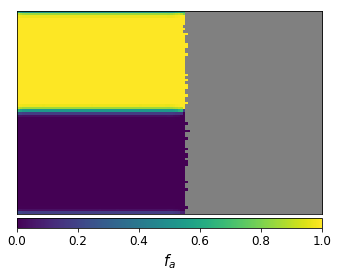

In [570]:
graphFreq(arrToFreq(profFileToArray(f,120,80)))

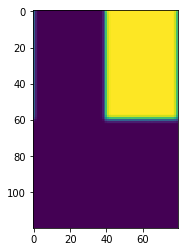

In [557]:
plt.imshow(arr[:,3].reshape(120,80))

In [555]:
arr[:,2].reshape(120,80)

array([[643717., 906275., 984291., ...,   6496.,  47468., 228137.],
       [454663., 616611., 665667., ...,   7248.,  44096., 181575.],
       [378818., 505650., 543299., ...,   6864.,  41424., 160969.],
       ...,
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.]])

In [525]:
plt.imshow(arr[:,2].reshape((80,40)))
plt.imshow(arr[:,].reshape((80,40)))

NameError: name 'rough' is not defined

In [562]:
def profFileToArray(file,ndemeh,ndemew):
    arr = np.loadtxt(file,delimiter =  ', ')
    arr_=np.copy(arr)
    if len(file)!=0:
        
        return arr_[:,2:].reshape((ndemeh,ndemew,2))
    
    else:
        return False
    
def arrToFreq(arr):
    arr_=np.copy(arr)
    return arr_[:,:,0]/(arr_[:,:,1]+arr_[:,:,0])

def getLastRow(arrFreq):
    arrFreq_ = np.copy(arrFreq)
    max_all = np.sum(np.all(~np.isnan(arrFreq_),axis=1))-1
    f_x = arrFreq_[max_all,:]
    return f_x

def getFrontLength(arrFreq):
    arrFreq_ = np.copy(arrFreq)
    width = arrFreq_.shape[1]
    max_deme = np.zeros(width)
    front =np.argwhere(~np.isnan(arrFreq_))
    for i in range(width):
        col = front[:,1]==i
        max_deme[i] = np.max(front[col,:][:,0])
    return(width+np.sum(np.abs(np.diff(max_deme))))
    
def getFront(arrFreq):
    arrFreq_ = np.copy(arrFreq)
    width = arrFreq_.shape[1]
    max_deme = np.zeros(width)
    front = np.argwhere(~np.isnan(arrFreq_))
    for i in range(width):
        col = front[:,1]==i
        max_col = np.max(front[col,:][:,0])
        max_deme[i] = arrFreq_[max_col,i]
    return max_deme

def getSectorLengths(arrFreq):
    arrFreq_ = np.copy(arrFreq)
    width = arrFreq_.shape[1]
    max_deme = np.zeros(width)
    max_col = np.zeros(width)
    sec_size = np.zeros(width)
    front = np.argwhere(~np.isnan(arrFreq_))
    for i in range(width):
        col = front[:,1]==i
        max_col[i] = np.max(front[col,:][:,0])
        max_deme[i] = arrFreq_[int(max_col[i]),i]
        sec_size[i] = np.argmax(((arrFreq_[:int(max_col[i]),i] == max_deme[i])*1==0)[::-1])+1
    return max(sec_size)
    
def sectorCountMed(arr_row):
    arr_row_ = np.copy(arr_row)
    diffs = np.zeros(50)
    diff_ = np.abs(np.diff(arr_row_))
    for i,l in enumerate(np.linspace(0,1,50)):

        diffs[i] = np.sum(diff_>l)
    return np.median(diffs)

def sectorCountMean(arr_row):
    arr_row_ = np.copy(arr_row)
    diffs = np.zeros(50)
    diff_ = np.abs(np.diff(arr_row_))
    for i,l in enumerate(np.linspace(0,1,50)):

        diffs[i] = np.sum(diff_>l)
    return np.mean(diffs)


def signalFilter(arrNum,thresh):
    arrNum= np.copy(arr_row)
    
    return 
def rowTrim(arr_row,split_thresh):
    arr_row_=np.copy(arr_row)
    diff1 = np.diff(arr_row_)
    if len(np.argwhere(diff1!=0).flatten())!=0:
        size= np.concatenate((1+np.argwhere(diff1!=0)[0],
                    np.diff(np.argwhere(diff1!=0).flatten()),
                    len(diff1)-np.argwhere(diff1!=0)[-1]) )


        inds = np.cumsum(size)-1
        split_inds = np.argwhere(size<split_thresh).flatten()
        cnt = 0 
        size_d = 0
        for i,ind in enumerate(inds[split_inds]):


            ind+=size_d

            curr_size = size[split_inds][cnt]

            if ind-curr_size>0:
                arr_row_ = np.concatenate((arr_row_[:ind-curr_size],arr_row_[ind+1:]))
            else: 
                arr_row_= arr_row_[ind+1:]

            size_d-=curr_size
            cnt+=1
    return arr_row_
    

def RowBinary(f_x, thresh):
    f_x_=np.copy(f_x)
    f_x_[f_x>thresh]=1
    f_x_[f_x_<(1-thresh)]=0
    f_x_[((f_x_ != 0) & (f_x_ != 1))]=.5
    return f_x_

#def anyRowBinary(arrFreq,row_ind, thresh):

#    f_x = arrFreq[rowind,:]
#    f_x[f_x>thresh]=1
#    f_x[f_x<(1-thresh)]=0
#    f_x[((f_x != 0) & (f_x != 1))]=.5
#    return f_x


#def sectorCount(arr_row):
#    arr_row_=np.copy(arr_row)
#    return np.sum(np.diff(arr_row_)!=0)+1

def sectorCount(arr_row):
    arr_row_=np.copy(arr_row)
    inds = np.argwhere(np.diff(arr_row_)!=0).flatten()

    if len(inds)>0:
        counts = np.bincount((arr_row_[inds]*2).astype(int),minlength=3)
    else:
        counts = np.array([1,0,0])
    return counts


def sectorProp(arr_row):
    arr_row_=np.copy(arr_row)
    counts = np.bincount((arr_row_*2).astype(int),minlength=2)
    return counts/np.sum(counts)
    
def demePropMix(arr_row):
    arr_row_=np.copy(arr_row)
    return np.sum((arr_row_ != 0) & (arr_row!=1))/len(arr_row_)

    
def corrFunc(arr_row):
    arr_row_=np.copy(arr_row)
    width =len(arr_row_)
    c_d =np.zeros(int(width/2))
    for i in range(int(width/2)):
        prod = 0
        for j in range(width):
            #print(f_x[i]*f_x[(i+1)%40])
            prod +=(arr_row_[j]*arr_row_[(j+i)%width])
        c_d[i] = prod/width
        
    return c_d


def corrSpikeCount(arr_row):
    arr_row_=np.copy(arr_row)
    return np.sum(np.diff(np.diff(fft(corrFunc(arr_row_))))<0) +1

def corrSpikes(arr_row):
    arr_row_=np.copy(arr_row)
    co = np.diff(fft(corrFunc(arr_row_)))
    sums=0
    for i in range(len(co)-1):
        if co[i]*co[i+1]<0 and (co[i]>0):
            sums +=1
        
    return sums  
    

In [558]:
def graphFreq(freqArr):
    fig,ax=plt.subplots()
    
    freqArr_=np.copy(freqArr)
    my_cmap = cm.get_cmap('viridis')
    my_cmap.set_bad('grey')
    #normalize = cm.colors.LogNorm(vmin=0, vmax=np.max(np.sum(prof_arr,axis=2)))
    #smap = cm.ScalarMappable(norm=normalize, cmap=my_cmap,no)
    #smap = cm.get_cmap('Purples',norm=normalize)
    


    im = ax.imshow(freqArr_.T,cmap=my_cmap
                   #,norm=normalize
                   ,vmin=0)
    ax.set_xticks([])
    ax.set_yticks([])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="5%", pad=0.05)
    #cbar_ticks= [1,10,100,1000,10000]
    cbar = fig.colorbar(im
                        #t,icks=cbar_ticks
                        ,orientation='horizontal',cax=cax)
    #cbar.ax.set_xticklabels(cbar_ticks,fontsize=12) 
    cbar.ax.tick_params(labelsize=12) 
    cbar.ax.set_xlabel('$f_a$',fontsize=15)
    plt.show()
   

In [569]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import scipy
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
from scipy import fft, ifft